# Imports

In [31]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


# Reading the data into df

In [3]:
#Reading the excel into data frame
df = pd.read_excel('Data file.xlsx')
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [4]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

In [5]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


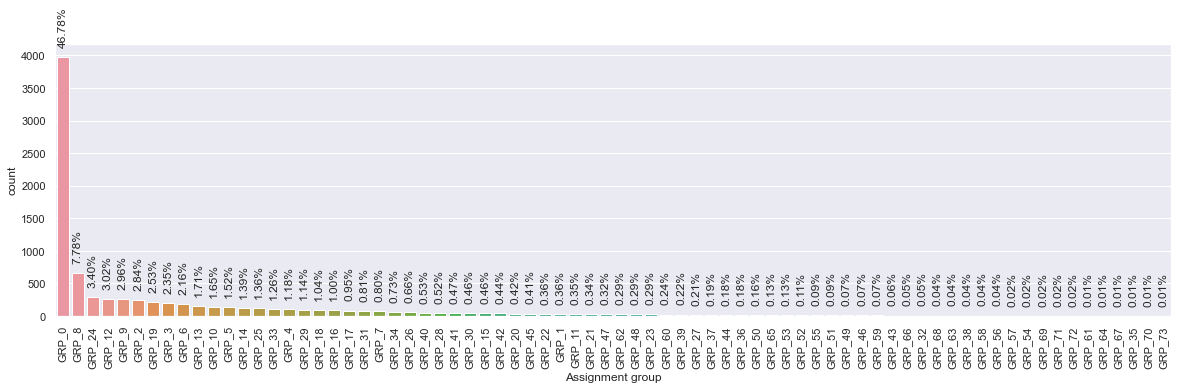

In [6]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [7]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [8]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [9]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


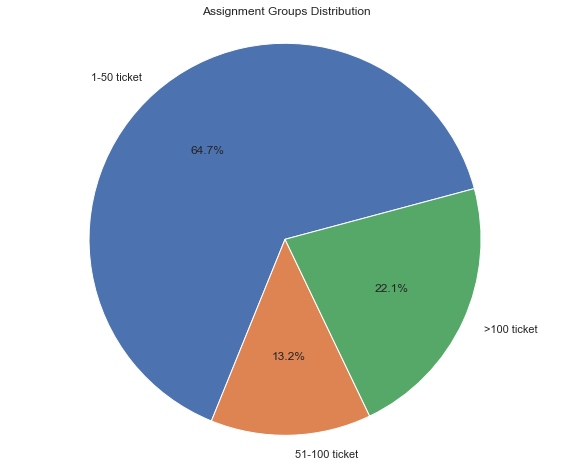

In [10]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [11]:
#checking the null values
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [12]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [13]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [14]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
Name: 4395, dtype: object

In [15]:
#Checking for the null values
df.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [16]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [17]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
1497,ticket update on ticket_no0449233,GRP_0,4
8078,company guest account not working which was cr...,GRP_0,9
7316,"ç¼–è¾‘pptæ—¶ï¼Œæ€»æ˜¯å¼¹å‡º""æ— æ³•æ£€æŸ¥æ‹¼å†™...",GRP_48,3
2421,please provide the following:_x000D_\n_x000D_\...,GRP_29,28
6454,HostName_108 (plm conversion server - kirty): ...,GRP_14,12
5063,windows password reset,GRP_0,3
6890,received from: monitoring_tool@company.com_x00...,GRP_6,12
8358,received from: monitoring_tool@company.com_x00...,GRP_9,12
6638,pc an reinecker wzs60 wahrscheinlich defekt. m...,GRP_33,8
4354,_x000D_\n_x000D_\nreceived from: gkerqucv.bqum...,GRP_0,21


In [18]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1657


In [19]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,GRP_30,1
415,complete,GRP_17,1
416,completed,GRP_0,1
608,funktionsstÃ¶rung,GRP_33,1
618,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,GRP_0,1
...,...,...,...
8059,the,GRP_17,1
8092,the,GRP_17,1
8093,the,GRP_17,1
8168,the,GRP_17,1


In [20]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [21]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
5166,need to activate new iphone,GRP_0,5,23
5831,install shop_floor_app on my machine,GRP_3,5,32
585,\n\nreceived from: kbclinop.vsczklfp@gmail.com...,GRP_0,64,359
3543,this is a location for the access database for...,GRP_12,59,294
7914,device replacement: setup new hp laserjet m575...,GRP_28,15,69


In [22]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [23]:
#Checking the maximum character count
feature_df['char_counts'].max()

12785

In [24]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
2348,coffee spillage on keybankrd,GRP_3,4,25,0.160000
3516,examples _x000D_\n5616762610_x000D_\n450562348...,GRP_29,15,123,0.121951
2412,ebhl8111120 does not ring when there is a call.,GRP_7,9,39,0.230769
823,no boot,GRP_0,2,6,0.333333
7742,received from: monitoring_tool@company.com_x00...,GRP_6,12,106,0.113208


In [25]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.009900990099009901
Maximum avg word count 1.0


In [28]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [32]:
print(stop_words)
len(stop_words)

{'themselves', 'becoming', 'you', 'under', 'forty', 'now', 'his', 'since', 'whose', 'already', 'elsewhere', 'rather', 'may', 'through', "n't", 'below', 'towards', 'both', 'are', 'first', 'bottom', 'hereupon', 'three', 'hereafter', 'which', 'again', 'enough', '‘m', 'front', 'nor', 'there', 'these', 'whence', 'anything', 'ourselves', 'whereafter', 're', 'seem', 'seeming', 'a', 'least', 'our', 'ca', 'amount', 'out', 'by', 'anyhow', 'never', 'fifty', 'where', 'latter', 'except', 'just', 'if', 'who', 'nevertheless', 'to', "'s", 'had', 'keep', 'without', 'we', '’ll', 'upon', 'namely', 'quite', 'also', 'why', 'thus', 'really', 'either', 'no', 'using', 'me', 'himself', 'what', 'everything', '’d', 'get', 'other', 'mine', 'hers', 'whole', 'too', 'they', 'of', 'that', 'side', 'him', 'nobody', 'otherwise', 'must', 'n’t', 'done', 'ten', 'whoever', 'someone', 'six', 'against', 'after', 'few', 'any', 'see', 'would', 'behind', 'myself', 'wherein', 'top', 'as', 'everyone', 'via', 'almost', 'so', 'even'

326

In [33]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
1231,_x000D_\n_x000D_\nreceived from: mfizgpoy.akbv...,GRP_16,40,271,0.147601,16
4647,mobile device activation,GRP_0,3,22,0.136364,0
3382,\n\nreceived from: jogtse.mhytusa@company.com\...,GRP_25,229,1272,0.180031,22
6086,from: microsoft on behalf of company inc. [mai...,GRP_0,151,880,0.171591,57
703,company center is not pulling replacement item...,GRP_13,38,206,0.184466,14


In [34]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 352


In [36]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
7491,fund id and budget postings affected are below...,GRP_15,47,434,0.108295,2,19
4461,_x000D_\n_x000D_\nreceived from: wcnfvajb.kxyl...,GRP_0,33,231,0.142857,8,0
6552,request to reset microsoft online services pas...,GRP_0,9,75,0.120000,2,0
5112,name:ilypdtno mkdfetuq_x000D_\nlanguage:_x000D...,GRP_0,14,190,0.073684,2,0
6980,"hello team,_x000D_\n_x000D_\ncould you please ...",GRP_0,19,199,0.095477,5,0


In [37]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 444
Minimum number of digits present 0


In [38]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
7974,"globalview (794, prtgghj4k) reset please!!!",GRP_17,5,39,0.128205,0,0,0
3653,hwbipgfq.sqiyfdax@gmail.com called to check ho...,GRP_0,11,70,0.157143,5,0,0
3226,\nsummary:urgent help required crm issue crm r...,GRP_0,23,109,0.211009,7,0,0
6398,\n\nreceived from: crkdjbot.qiztrxne@gmail.com...,GRP_0,23,240,0.095833,7,0,0
7420,_x000D_\n_x000D_\nreceived from: fdmobjul.oica...,GRP_0,32,256,0.125000,8,0,0


In [39]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [40]:
df.sample(5)

,Short description,Description,Caller,Assignment group
2134,account locked,account locked,nsoikcyf jhybqael,GRP_0
516,outlook freezing issue,outlook freezing issue,kailyenh zfyvkopr,GRP_0
7332,password reset,name:mikhghytr karaffa\nlanguage:\nbrowser:mic...,vfrdxtqw jfbmsenz,GRP_0
7865,password,_x000D_\n_x000D_\nreceived from: xzjlkfvc.agfm...,xzjlkfvc agfmpyhr,GRP_0
2415,need access to \\891245132\scan,\nzugriff auf verzeichnis angefragt.\nfolder a...,ohdrnswl rezuibdt,GRP_19




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets, hence the caller column does not hold any value for the classification. There might be certain correlation However it will add bias. Hence removing the column also



In [41]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [42]:
df['language'].value_counts()

en    7014
de     406
af     266
it     139
fr     129
sv      81
no      69
da      69
nl      59
ca      59
es      51
pt      28
pl      27
ro      17
so      14
sl      10
tl      10
sq       9
cy       8
hr       8
fi       7
id       5
et       4
tr       4
sk       3
lt       2
cs       2
Name: language, dtype: int64

In [43]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [44]:
#pip install googletrans

In [45]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [46]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language,English_Description
571,erp SID_34 password reset.,erp SID_34 password reset.,jvxtfhkg heptuizn,GRP_0,af,erp SID_34 password reset.
2666,password reset request,password reset request,jmoqelbc fbzsyjne,GRP_0,ca,password reset request
7232,erp logon does not open,_x000D_\n_x000D_\nreceived from: qjtbrvfy.avwq...,qjtbrvfy avwqmhsp,GRP_0,en,_x000D_\n_x000D_\nreceived from: qjtbrvfy.avwq...
1888,not able to connect to vpn,not able to connect to vpn,mtzjkhpi sfcmyjzx,GRP_0,en,not able to connect to vpn
3684,maus defekt .,"hallo ,_x000D_\nich und howfanzi siavgtby bra...",tkhaymqg cwuqzyvm,GRP_24,de,"hallo ,_x000D_\nich und howfanzi siavgtby bra..."


In [47]:
df_translated_text=df.drop(['Description','language'],axis=1)

In [48]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [49]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description
7905,unable to launch outlook,wjtzrmqc ikqpbflg,GRP_0,unable to launch outlook
7603,HostName_214 (erp-SID_51 app1-production): ave...,dkmcfreg anwmfvlg,GRP_14,HostName_214 erpSID_51 app1production average...
542,laptop issues,lwizucan zvnxlobq,GRP_0,received from lwizucanzvnxlobqgmailcomhallomy ...
1475,ticket update on inplant_869259,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_869259
4596,computer can't started,zyblacuk mvjqwgzn,GRP_31,computer cant started


In [50]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [51]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions
359,problems with nikulatrhdy,koahsriq wdugqatr,GRP_0,received from koahsriqwdugqatrgmailcomhellothe...,received from koahsriqwdugqatrgmailcomhellothe...
6425,job HostName_1019fail failed in job_scheduler ...,bpctwhsn kzqsbmtp,GRP_60,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...
3993,please setup printers dg04 and dg08 on HostNam...,glnfyoqe fexlisau,GRP_12,please setup printers dg04 and dg08 on HostNam...,please setup printers dg04 and dg08 on HostNam...
5149,å¼€ä¸äº†æœº,kclhqspo xvugztyc,GRP_30,åääºæœºïŒæçºççŸåäºã,åääºæœºïŒæçºççŸåäºã
226,enable bgdxitwu dhcopwxa' active directory acc...,kcwqdeob jwtpkzub,GRP_2,enable bgdxitwu dhcopwxa active directory acco...,enable bgdxitwu dhcopwxa active directory acco...


In [52]:
  
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)


,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
7542,collaboration_platform online is not opening.,wczrtsja crwioekx,GRP_0,collaboration_platform online is not opening_x...,collaboration_platform online is not opening_x...,collaboration_platform online opening_x000D__x...
1579,windows account frequently getting locked.,wyxqkzmf urigtqnp,GRP_0,windows account frequently getting locked,windows account frequently getting locked,windows account frequently getting locked
6373,aw: please take this survey related to ticket_...,efjzbtcm mdpviqbf,GRP_0,received from efjzbtcmmdpviqbfgmailcomnein fun...,received from efjzbtcmmdpviqbfgmailcomnein fun...,received efjzbtcmmdpviqbfgmailcomnein funktion...
3509,unable to install crm app on galaxy s3,tuzkadxv rxloutpn,GRP_63,user has a samsung galaxy s3 device with andro...,user has a samsung galaxy s3 device with andro...,user samsung galaxy s3 device android 43 os wa...
4811,job Job_553 failed in job_scheduler at: 09/09/...,bpctwhsn kzqsbmtp,GRP_5,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...,received monitoring_toolcompanycom_x000D__x000...


In [53]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
6369,can't copy/save pdf of drawing from business_c...,edanpfzl qyrfndkp,GRP_0,application used to work till aug 23 user was ...,application used to work till aug 23 user was ...,application work till aug 23 user able copy sa...
2282,wk38 -> qdxyifhj zbwtunpy,qmwhlnev ixtmkwdc,GRP_33,halo der drucker bereitet problem mit dem druc...,halo der drucker bereitet problem mit dem druc...,halo der drucker bereitet problem mit dem druc...
8339,unlock account email in cell phone the users,qasdhyzm yuglsrwx,GRP_0,hello teamcould you please unlock account ema...,hello teamcould you please unlock account emai...,hello teamcould unlock account emails cell pho...
3565,probleme mit erpgui \jionmpsf wnkpzcmv,jionmpsf wnkpzcmv,GRP_24,probleme mit erpgui jionmpsf wnkpzcmv,probleme mit erpgui jionmpsf wnkpzcmv,probleme mit erpgui jionmpsf wnkpzcmv
5220,business_client - a plug-in is not responding,irpvzhym kayqlbuh,GRP_0,i need to view attachments in er2248695 but i ...,i need to view attachments in er2248695 but i ...,need view attachments er2248695 error plugin r...


In [54]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [55]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(15)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
3810,erp password reset for user : lombab<vrcqhnty ...,pxwhlnse hjfzvsoa,GRP_0,summaryoperator does not know their mii erp us...,summaryoperator does not know their mii erp us...,summaryoperator know mii erp username password
4644,mobile device activation,puxsvfwr cwkjruni,GRP_0,from puxsvfwr cwkjruni _x000D_sent monday sept...,from puxsvfwr cwkjruni _x000D_sent monday sept...,puxsvfwr cwkjruni _x000D_sent monday september...
1652,need display link adaptor and simcard holder,zdgxtfqs tibmhxcs,GRP_19,_x000D__x000D_received from zdgxtfqstibmhxcsgm...,_x000D__x000D_received from zdgxtfqstibmhxcsgm...,_x000D__x000D_received zdgxtfqstibmhxcsgmailco...
5864,ad account lock out,neoarmgd meodvbxu,GRP_0,ad account lock out,ad account lock out,ad account lock
5976,unable to load crm add in on outlook,owlgqjme qhcozdfx,GRP_0,unable to load crm add in on outlook,unable to load crm add in on outlook,unable load crm add outlook
2303,chg1145744 - stop the reminders,atdclmyi wqxzaysu,GRP_0,_x000D__x000D_received from atdclmyiwqxzaysugm...,_x000D__x000D_received from atdclmyiwqxzaysugm...,_x000D__x000D_received atdclmyiwqxzaysugmailco...
5302,job Job_3181 failed in job_scheduler at: 09/05...,bpctwhsn kzqsbmtp,GRP_8,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...,received monitoring_toolcompanycom_x000D__x000...
5836,whenever i open an email with a jpg attachemen...,hitakmbs fvhmkntq,GRP_3,whenever i open an email with a jpg attachemen...,whenever i open an email with a jpg attachemen...,open email jpg attachement security warning
7687,erp SID_34 account unlock and password reset,jcxwgslk szvgufir,GRP_0,erp SID_34 account unlock and password reset,erp SID_34 account unlock and password reset,erp SID_34 account unlock password reset
6817,rqxsm004 : f:/ is now 96% utilized.,uvrbhlnt bjrmalzi,GRP_1,f labeldat2rqxsm004 dc86ed35 on server rqxsm00...,f labeldat2rqxsm004 dc86ed35 on server rqxsm00...,f labeldat2rqxsm004 dc86ed35 server rqxsm004 _...


In [56]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [57]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))

In [58]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [59]:
df_translated_text.head()

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords,cleaned_description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user detailsemployee manager name_x0...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,16
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,13
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,4
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,unable access hr_tool page,unable access hr_tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error,2


In [60]:
df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

In [61]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1292
Minimum no of words 0


In [121]:
df_translated_text.shape

(8500, 8)

In [62]:
df_text=df_text[df_text['number_of_words']>0]


In [63]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [64]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [65]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [66]:
df_text=df_text.replace(list_1,'Others')

In [67]:
len(df_text['Assignment group'].value_counts().unique())

21

In [68]:
df_text.sample(10)

,Assignment group,cleaned_description,number_of_words
4643,GRP_12,users unable connect network drives HostName_1...,8
3659,GRP_0,erp SID_34 account locked,4
2418,GRP_0,windows password reset,3
1594,GRP_0,unable open emails outlook,4
5048,GRP_0,account unlock,2
4184,GRP_24,install pdfmailer ahlqgjwx wbsfavhg,4
8340,GRP_12,HostName_1015 average 4 samples disk free c 15...,15
5055,GRP_0,constantly receiving usb device recognized ins...,11
7690,GRP_0,erp SID_34 locked,3
6332,GRP_5,_x000D__x000D_received repyzajolxfwopyqgmailco...,27


In [ ]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'

In [104]:
df_bk = df_text

In [105]:
df_bk = df_bk.replace(to_replace = email_pattern, value='email', regex=True)

In [106]:
df_bk = df_bk.replace(to_replace = '::', value=':', regex=True)

In [107]:
df_bk = df_bk.replace(to_replace = url_pattern, value='url', regex=True)

In [108]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)

In [109]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value='<IP Address>', regex=True)

In [110]:
df_bk['cleaned_description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)


In [111]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value='file path', regex=True)

In [112]:
df_bk = df_bk.replace(to_replace = 'received from:', value='', regex=True)

In [113]:
df_bk['cleaned_description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)

In [117]:
df_bk.shape

(8444, 3)

In [118]:
df_text.shape

(8444, 3)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    8492 non-null   object
 1   Description          8500 non-null   object
 2   Caller               8500 non-null   object
 3   Assignment group     8500 non-null   object
 4   language             8500 non-null   object
 5   English_Description  8500 non-null   object
dtypes: object(6)
memory usage: 398.6+ KB


In [142]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

In [115]:
df_bk.to_csv('translated_ticketfin.csv', index=False, encoding='utf_8_sig')

In [122]:
combined_text=df_bk.cleaned_description.values.tolist()

In [123]:
combined_text[1]

'   meetingsskype meetings etc appearing outlook calendar somebody advise correct '

In [124]:
#pip install gensim

In [125]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [126]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [127]:
data_words

[['verified',
  'user',
  'detailsemployee',
  'manager',
  'user',
  'ad',
  'reset',
  'user',
  'login',
  'confirmed',
  'able',
  'resolved'],
 ['meetingsskype',
  'meetings',
  'etc',
  'appearing',
  'outlook',
  'calendar',
  'somebody',
  'advise',
  'correct'],
 ['log'],
 ['unable', 'access', 'page'],
 ['skype', 'error'],
 ['unable', 'log', 'engineering', 'tool', 'skype'],
 ['event', 'value', 'mountpoint', 'threshold', 'alpha'],
 ['employment', 'status', 'new', 'nonemployee', 'enter', 'users'],
 ['unable', 'disable', 'add', 'ins', 'outlook'],
 ['ticket', 'update'],
 ['engineering', 'tool', 'says', 'connected', 'unable', 'submit', 'reports'],
 ['site', 'loading', 'page', 'correctly'],
 ['unable', 'login', 'sgxqsuojr', 'xwbesorf', 'cards'],
 ['user', 'wants', 'reset', 'password'],
 ['unable', 'open', 'payslips'],
 ['ticket', 'update'],
 ['received',
  'xyzcompanycomi',
  'unable',
  'login',
  'company',
  'vpn',
  'website',
  'trying',
  'open',
  'new',
  'session',
  'link'

In [157]:
dat = pd.DataFrame({'col':data_words})

In [166]:
dat.sample(5)

,col
5833,"[provide, new, password]"
1576,"[frequent, account, lockout, windows]"
5049,"[received, failed, alpha, alpha]"
7713,"[received, try, submit, discount, form, error,..."
374,"[file, printed, error, alpha]"


In [160]:
dat.sample(5)

,col
7599,"[olifgtmpio, gargtcia, blagtnco, working, comp..."
6348,"[error, erp]"
1513,"[budighfl, izbxvarybrowser, microsoft, interne..."
1035,"[reinstall, alpha, qidgvtwa, qvbutayx]"
3162,"[reset, password, cyvdluja, oxrkfpbz]"


In [128]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [129]:
print(bigram_mod[data_words[1]])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [130]:
print(trigram_mod[bigram_mod[data_words[1]]])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [131]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [132]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [133]:
print(data_words_bigrams[1])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [139]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

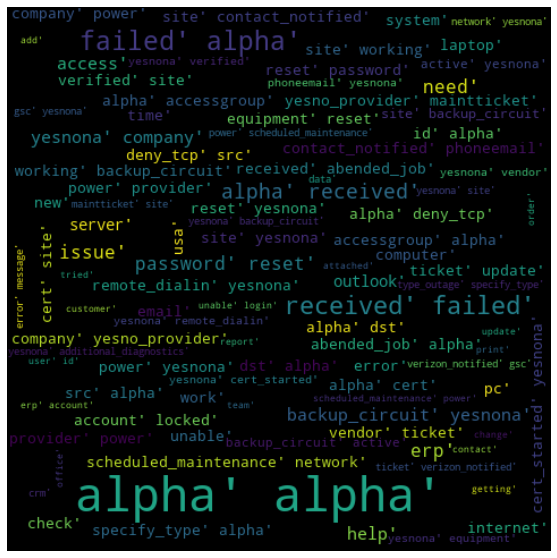

In [137]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [141]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Assignment group,cleaned_description,number_of_words,words
0,GRP_0,verified user detailsemployee manager user ad...,16,"[verified, user, detailsemployee_manager, user..."
1,GRP_0,meetingsskype meetings etc appearing outloo...,13,"[meetingsskype, meetings, etc, appearing, outl..."
2,GRP_0,log,4,[log]
3,GRP_0,unable access page,4,"[unable, access, page]"
4,GRP_0,skype error,2,"[skype, error]"
...,...,...,...,...
8495,GRP_29,receiving emails sent zz,9,"[receiving, emails, sent, zz]"
8496,GRP_0,issue,2,[issue]
8497,GRP_0,alpha windows password reset tifpdchb pedxruyf,6,"[alpha, windows, password, reset, tifpdchb, pe..."
8498,Others,unable access macne utilities finish drawers a...,9,"[unable, access, macne, utilities, finish, dra..."


In [ ]:
new_df = itTicketDF.copy()
new_df['words'] = data_words_bigrams
new_df


In [146]:
new_df['word_count']=new_df['cleaned_description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['cleaned_description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['cleaned_description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [149]:
new_df.sample(5)

,Assignment group,cleaned_description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
7837,GRP_24,setup new ws ylhptzmd owslfzqi,5,"[setup, new_ws, ylhptzmd, owslfzqi]",5,26,0,0.192308
1539,GRP_19,assist unable reprint ecs system attached ...,40,"[assist, unable, reprint, ecs, system, attache...",25,189,0,0.132275
5164,GRP_0,unable log,3,"[unable, log]",2,9,0,0.222222
1185,GRP_0,unable access emails outlook,4,"[unable, access, emails, outlook]",4,25,0,0.160000
3414,GRP_0,received qjiutmelfgvtxeoygmailcomcrm mobile de...,7,"[received, mobile_device, work, screen, alpha]",7,62,0,0.112903


# Ends Here

In [79]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

In [77]:
#pip install plotly cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [78]:
df['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

PlotlyRequestError: Authentication credentials were not provided.

In [ ]:

#pip install chart_studio

In [93]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(df['Description']):
  df['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)


import spacy
import en_core_web_sm

spacy.prefer_gpu()
nlp = en_core_web_sm.load()

#nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['Description'] = df['Description'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ModuleNotFoundError: No module named 'en_core_web_sm'

In [2]:
import spacy
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])
# Take an example of row# 43 Description and lemmatize it


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.